1. Lectura de datos
-------------------
- Carga el archivo pokemon_primera_gen.csv en un DataFrame de Pandas.

In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


pokedex = pd.read_csv("pokemon_primera_gen.csv")

print(pokedex)

         Nombre    Tipo 1   Tipo 2  Ataque  Defensa  Velocidad   PS
0     Bulbasaur    Planta   Veneno      49       49         45   45
1       Ivysaur    Planta   Veneno      62       63         60   60
2      Venusaur    Planta   Veneno      82       83         80   80
3    Charmander     Fuego      NaN      52       43         65   39
4    Charmeleon     Fuego      NaN      64       58         80   58
..          ...       ...      ...     ...      ...        ...  ...
146     Dratini    Dragón      NaN      64       45         50   41
147   Dragonair    Dragón      NaN      84       65         70   61
148   Dragonite    Dragón  Volador     134       95         80   91
149      Mewtwo  Psiquico      NaN     110       90        130  106
150         Mew  Psiquico      NaN     100      100        100  100

[151 rows x 7 columns]


2. Filtrado y selección
-----------------------
- Filtra todos los Pokémon de tipo "Fuego".
- Selecciona solo las columnas Nombre, Tipo 1, Ataque y Velocidad.

In [37]:
tipo_fuego = pokedex[pokedex["Tipo 1"] == "Fuego"]
print(tipo_fuego[["Nombre","Tipo 1","Ataque","Velocidad"]])

         Nombre Tipo 1  Ataque  Velocidad
3    Charmander  Fuego      52         65
4    Charmeleon  Fuego      64         80
5     Charizard  Fuego      84        100
36       Vulpix  Fuego      41         65
37    Ninetales  Fuego      76        100
57    Growlithe  Fuego      70         60
58     Arcanine  Fuego     110         95
76       Ponyta  Fuego      85         90
77     Rapidash  Fuego     100        105
125      Magmar  Fuego      95         93
135     Flareon  Fuego     130         65
145     Moltres  Fuego     100         90


3. Estadística descriptiva básica
---------------------------------
- Calcula el promedio, la mediana y la moda del ataque de todos los Pokémon.
- ¿Cuál es el Pokémon con mayor defensa? ¿Y el de menor velocidad?
- ¿Cuántos Pokémon tienen dos tipos?
- Calcula el rango y la desviación estándar de los PS (Puntos de Salud).

In [38]:
promedio = np.mean(pokedex["Ataque"])
mediana = np.median(pokedex["Ataque"])
moda_ataque = pokedex["Ataque"].mode().values[0] 
max_defensa = np.max(pokedex["Defensa"])
min_velocidad = np.min(pokedex["Velocidad"])
dos_tipos = pokedex["Tipo 2"].notna() & (pokedex["Tipo 2"] != "")
dos_tipos_cantidad = dos_tipos.sum()
rango_ataque = np.max(pokedex["PS"]) - np.min(pokedex["PS"])
desviacion = pokedex["PS"].std()

print(f"promedio: {round(promedio,1)}\n,mediana: {mediana}\n, moda: {moda_ataque}\n, max_defensa: {max_defensa}\n, min_velocidad: {min_velocidad}\n, dos tipos: {dos_tipos_cantidad}\n, rango: {rango}\n, desviacion: {desviacion}\n")

promedio: 72.4
,mediana: 70.0
, moda: 65
, max_defensa: 180
, min_velocidad: 15
, dos tipos: 67
, rango: 240
, desviacion: 28.590117003730075



4. Visualización de datos
-------------------------
- Haz un histograma de los valores de ataque.
- Realiza un gráfico de dispersión entre ataque y velocidad.
- Haz un boxplot de los PS por tipo principal (Tipo 1).
- Grafica la distribución de la defensa usando un diagrama de violín.

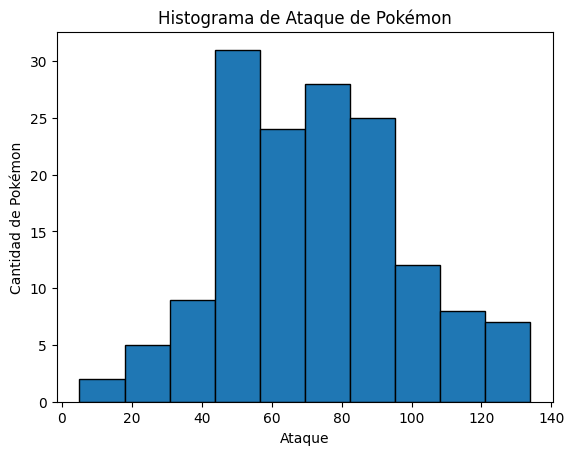

In [ ]:
plt.hist(pokedex["Ataque"], bins=10, edgecolor='black')  # puedes cambiar 'bins' según lo detallado que quieras el histograma
plt.xlabel("Ataque")
plt.ylabel("Cantidad de Pokémon")
plt.title("Histograma de Ataque de Pokémon")
plt.show()